# QSVT Analysis


### Editable parameters

In [1]:
# --- Optimal polynomial plot ---
kappa = 6
target_epsilon = 0.47
n_full = 4000
n_branch = 2000

# --- Degree comparison plot (fixed κ, varying d) ---
ds_compare = [5, 15, 25, 35]

# --- Error-vs-degree plots ---
kappa_error_single = 5000
d_max_single = 100001
# multiple κ on same axes
kappas_compare = [50, 500, 5000]
d_max_compare = 1001
# κ subplots with per-κ d_max (optional)
kappas_subplots = [5, 50, 500]
d_max_subplots = [101, 1001, 10001]

# --- Output controls ---
save_plots = True
save_results = True 
make_zip = False


### Imports

In [2]:
from pathlib import Path
import zipfile
import matplotlib.pyplot as plt

from utils.export import *
from qsvt.qsvt_optimal_poly import *

### Output saving settings

In [3]:
run_name = "qsvt"  # used for filenames

ROOT = find_repo_root()
FIG_DIR, RES_DIR = ensure_out_dirs(ROOT)
print("Repo root:", ROOT)

run_id = make_run_id(run_name)
print("Run id:", run_id)

generated_files: list[Path] = []

Repo root: C:\Users\CristinaÁlvarezYuste\OneDrive - Quantum Mads\Documentos\GitHub\Quantum-assisted-Optimal-Control-examples
Run id: qsvt_20260122_085919_022947


## 1.1) Optimal polynomial for given kappa and epsilon

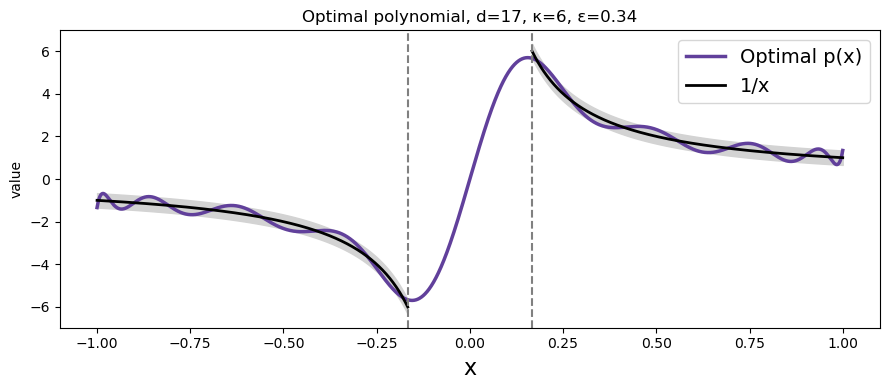

In [4]:
fig1, ax1, d1, p1, eps1, a1 = plot_optimal_poly_for_kappa(
    kappa=kappa,
    target_epsilon=target_epsilon,
    n_full=n_full,
    n_branch=n_branch,
    show=True,
    color = plt.get_cmap("Purples")(0.8)
)

meta_opt = {
    "kappa": float(kappa),
    "target_epsilon": float(target_epsilon),
    "a": float(a1),
    "degree": int(d1),
    "eps_bound": float(eps1),
    "chebyshev_coef": [float(c) for c in p1.coef],
}

if save_plots:
    out = FIG_DIR / f"{run_id}_optimal_poly_kappa{float(kappa):g}_eps{float(target_epsilon):g}.pdf"
    fig1.savefig(out, dpi=200)
    generated_files.append(out)

if save_results:
    out = RES_DIR / f"{run_id}_optimal_poly_meta.json"
    save_json(out, meta_opt)
    generated_files.append(out)

## 1.2) Optimal polynomial comparison for different degrees and given kappa

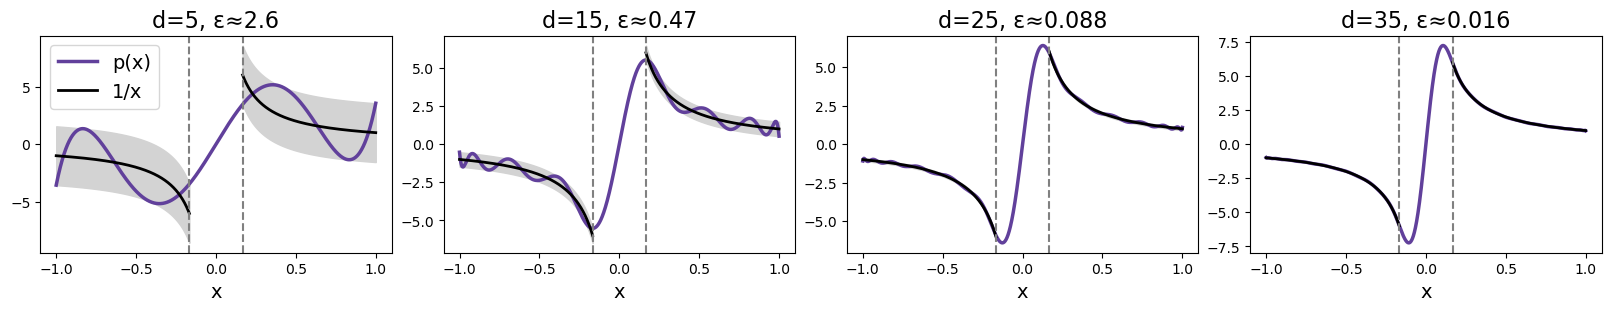

In [5]:
fig2, axs2, a2 = plot_poly_degree_comparison(
    kappa=kappa,
    ds=ds_compare,
    n_full=n_full,
    n_branch=n_branch,
    show=True,
    color = plt.get_cmap("Purples")(0.8),
    ylim=None,
    figsize_per_ax=(4, 3)
)

meta_deg = {
    "kappa": float(kappa),
    "a": float(a2),
    "degrees": [int(d) for d in ds_compare],
    "eps_bounds": [float(optimal_uniform_error(int(d), float(kappa))) for d in ds_compare],
}

if save_plots:
    out = FIG_DIR / f"{run_id}_poly_degree_comparison_kappa{float(kappa):g}.pdf"
    fig2.savefig(out, dpi=200)
    generated_files.append(out)

if save_results:
    out = RES_DIR / f"{run_id}_poly_degree_comparison_meta.json"
    save_json(out, meta_deg)
    generated_files.append(out)

## 2.1) Error vs degree (single κ)

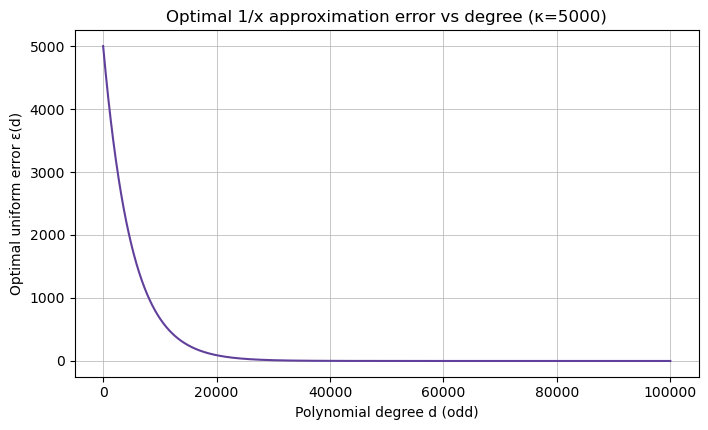

In [6]:
fig3, ax3, ds3, eps3 = plot_error_vs_degree(
    kappa=kappa_error_single,
    d_max=d_max_single,
    logy=False,
    show=True,
    color = plt.get_cmap("Purples")(0.8)
)

if save_plots:
    out = FIG_DIR / f"{run_id}_error_vs_degree_kappa{float(kappa_error_single):g}_dmax{int(d_max_single)}.pdf"
    fig3.savefig(out, dpi=200)
    generated_files.append(out)

if save_results:
    out = RES_DIR / f"{run_id}_error_vs_degree_kappa{float(kappa_error_single):g}.npz"
    save_npz(out, ds=ds3, eps=eps3)
    generated_files.append(out)

## 2.2) Error vs degree (multiple κ on same axes)

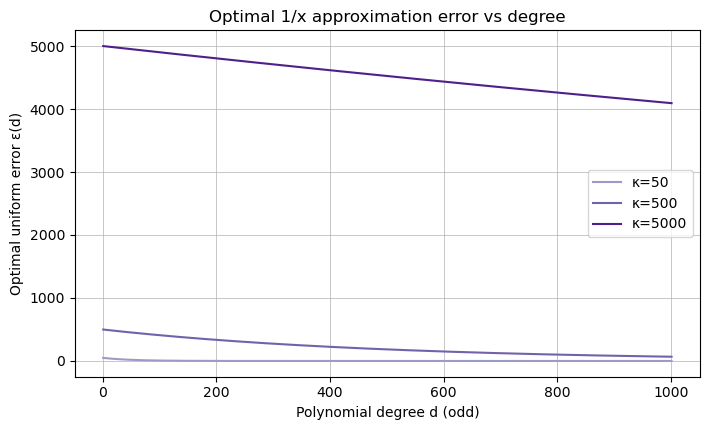

In [7]:
fig4, ax4, ds4, eps_by_kappa4 = plot_error_vs_degree_comparison(
    kappas=kappas_compare,
    d_max=d_max_compare,
    logy=False,
    show=True,
    colors=[plt.get_cmap("Purples")(0.5), plt.get_cmap("Purples")(0.7), plt.get_cmap("Purples")(0.9)],
)
if save_plots:
    out = FIG_DIR / f"{run_id}_error_vs_degree_comparison_dmax{int(d_max_compare)}.pdf"
    fig4.savefig(out, dpi=200)
    generated_files.append(out)

if save_results:
    for k, eps in eps_by_kappa4.items():
        out = RES_DIR / f"{run_id}_error_vs_degree_kappa{k:g}_dmax{int(d_max_compare)}.npz"
        save_npz(out, ds=ds4, eps=eps)
        generated_files.append(out)

## 2.3) Error vs degree (subplots per κ)

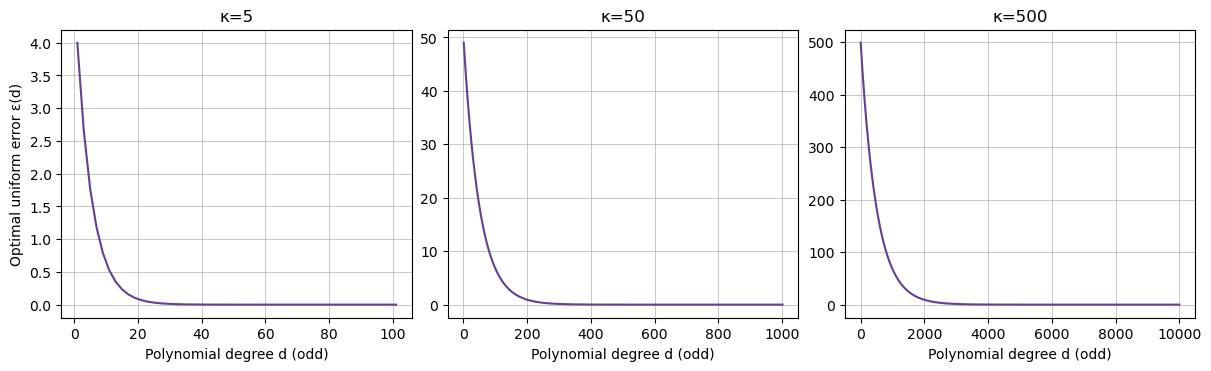

In [8]:
fig5, axs5, ds_list5, eps_by_kappa5 = plot_error_vs_degree_subplots(
    kappas=kappas_subplots,
    d_max=d_max_subplots,
    logy=False,
    show=True,
    color = plt.get_cmap("Purples")(0.8)
)

if save_plots:
    out = FIG_DIR / f"{run_id}_error_vs_degree_subplots.pdf"
    fig5.savefig(out, dpi=200)
    generated_files.append(out)

if save_results:
    for k in [float(x) for x in kappas_subplots]:
        out = RES_DIR / f"{run_id}_error_vs_degree_kappa{k:g}_subplot.npz"
        save_npz(out, ds=ds_list5[[float(x) for x in kappas_subplots].index(k)], eps=eps_by_kappa5[k])
        generated_files.append(out)

## 3) Save outputs into a single zip file

In [9]:
zip_path = RES_DIR / f"{run_id}_outputs.zip"

if make_zip:
    with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as zf:
        for p in generated_files:
            zf.write(p, arcname=str(p.relative_to(ROOT)))
    print("Created:", zip_path)
    try:
        from IPython.display import FileLink, display
        display(FileLink(str(zip_path)))
    except Exception:
        pass
else:
    print("make_zip=False; skipping zip creation")

print("\nGenerated files:")
for p in generated_files:
    print(" -", p)

make_zip=False; skipping zip creation

Generated files:
 - C:\Users\CristinaÁlvarezYuste\OneDrive - Quantum Mads\Documentos\GitHub\Quantum-assisted-Optimal-Control-examples\figures\qsvt_20260122_085919_022947_optimal_poly_kappa6_eps0.47.pdf
 - C:\Users\CristinaÁlvarezYuste\OneDrive - Quantum Mads\Documentos\GitHub\Quantum-assisted-Optimal-Control-examples\results\qsvt_20260122_085919_022947_optimal_poly_meta.json
 - C:\Users\CristinaÁlvarezYuste\OneDrive - Quantum Mads\Documentos\GitHub\Quantum-assisted-Optimal-Control-examples\figures\qsvt_20260122_085919_022947_poly_degree_comparison_kappa6.pdf
 - C:\Users\CristinaÁlvarezYuste\OneDrive - Quantum Mads\Documentos\GitHub\Quantum-assisted-Optimal-Control-examples\results\qsvt_20260122_085919_022947_poly_degree_comparison_meta.json
 - C:\Users\CristinaÁlvarezYuste\OneDrive - Quantum Mads\Documentos\GitHub\Quantum-assisted-Optimal-Control-examples\figures\qsvt_20260122_085919_022947_error_vs_degree_kappa5000_dmax100001.pdf
 - C:\Users\Cris